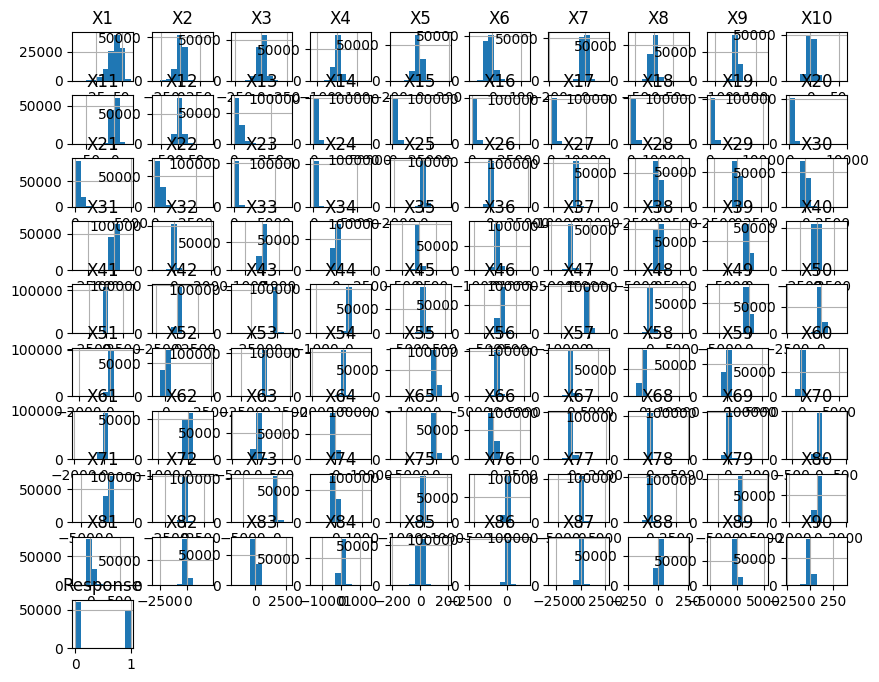

<ipython-input-3-5ab4dc34f63b>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


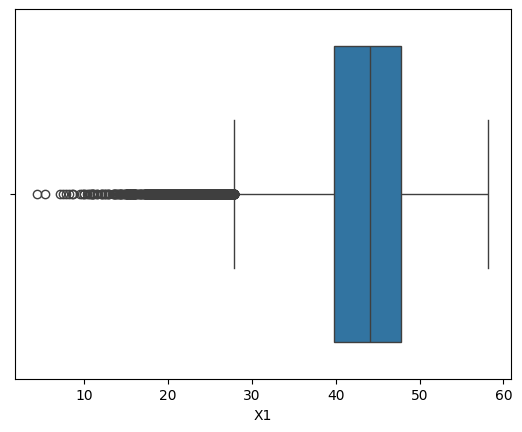

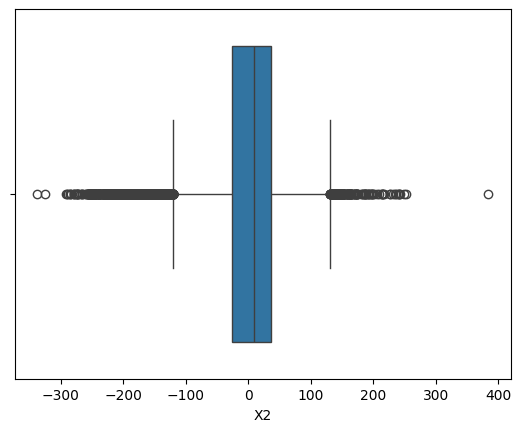

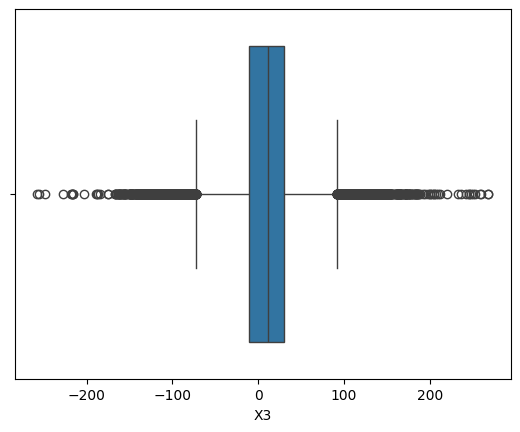

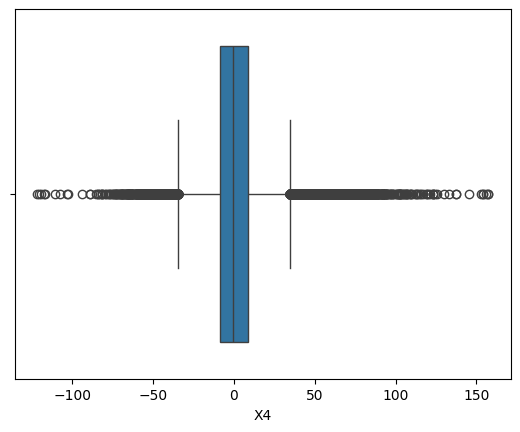

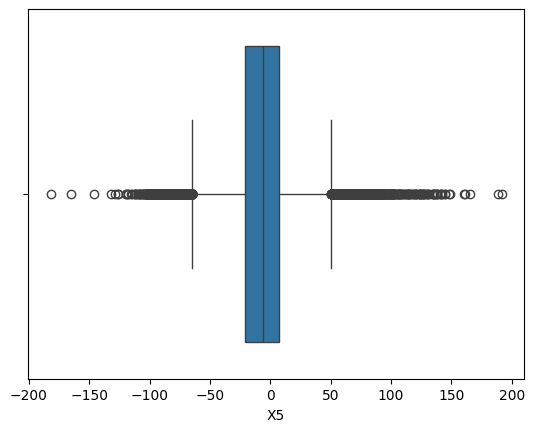

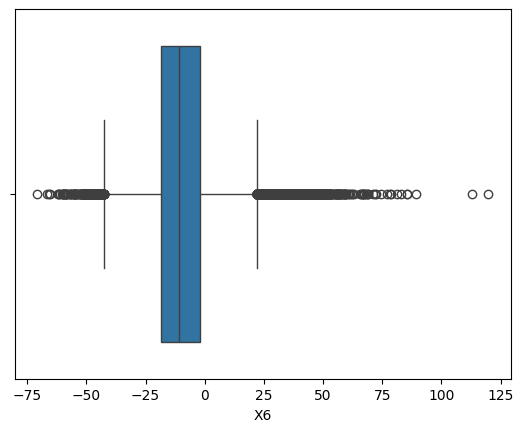

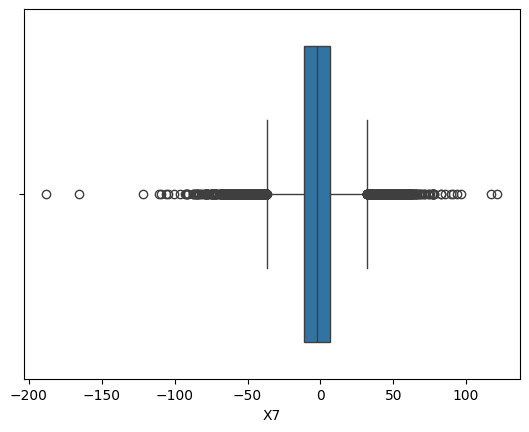

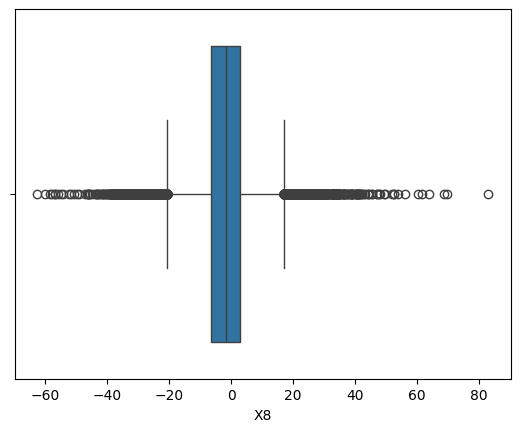

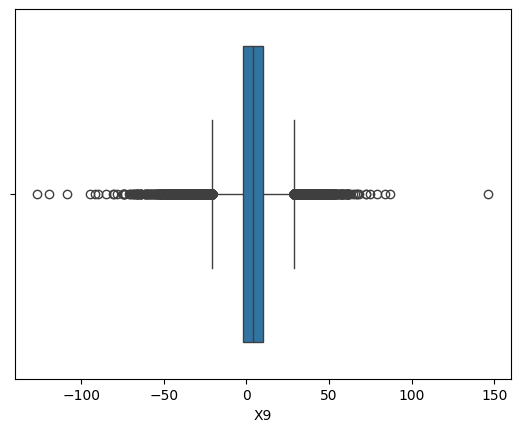

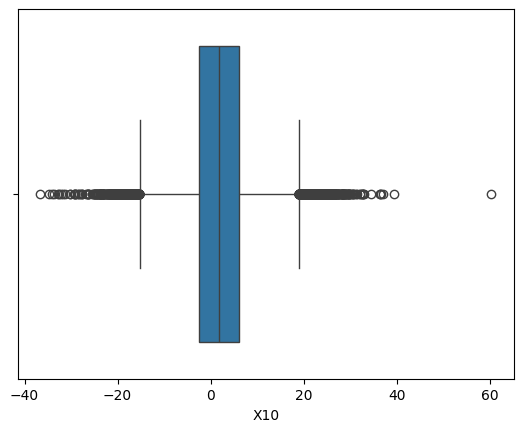

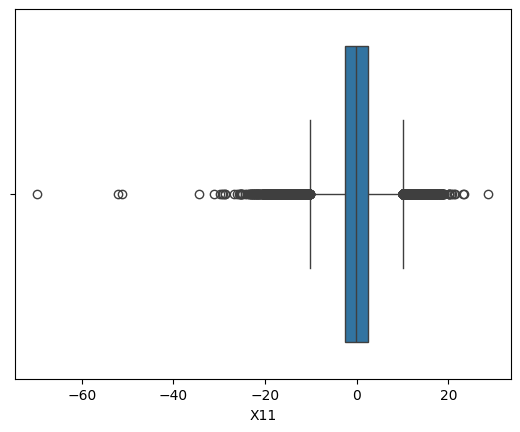

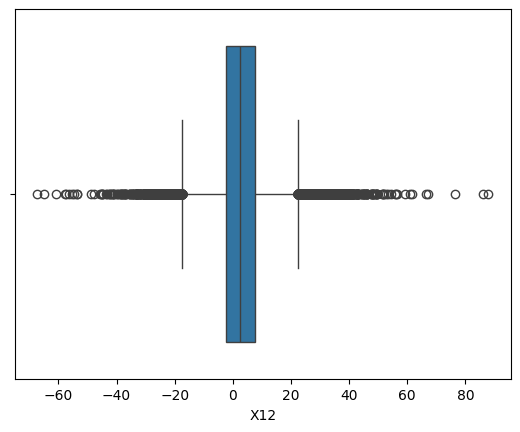

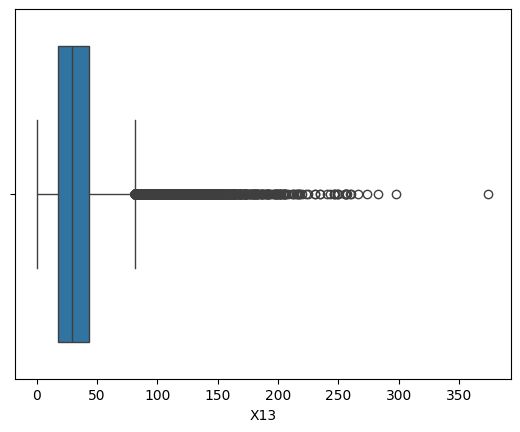

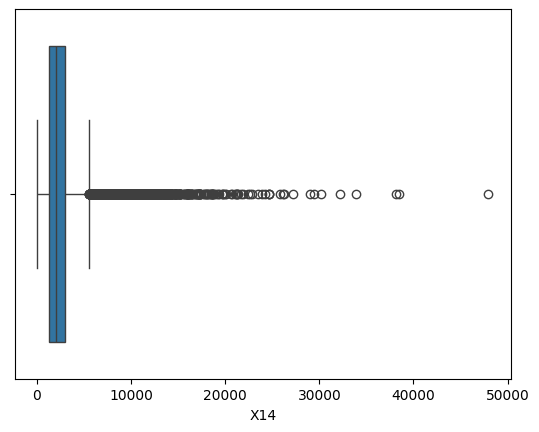

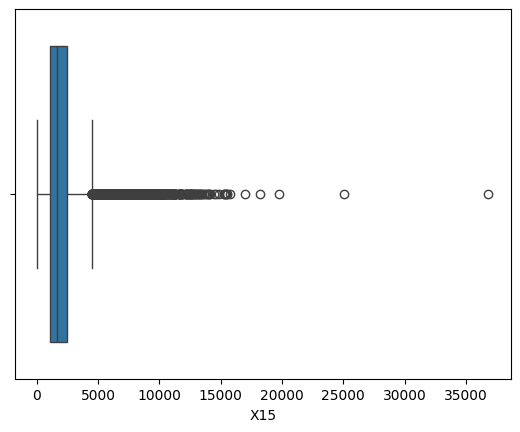

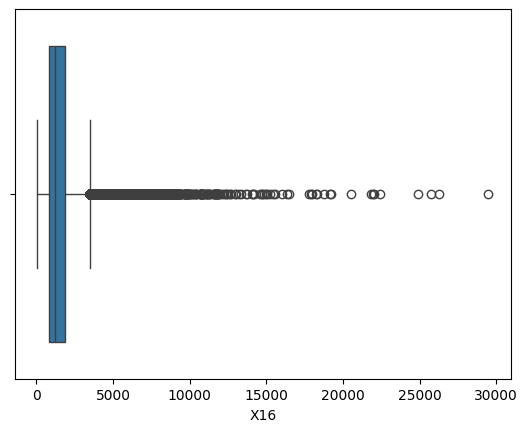

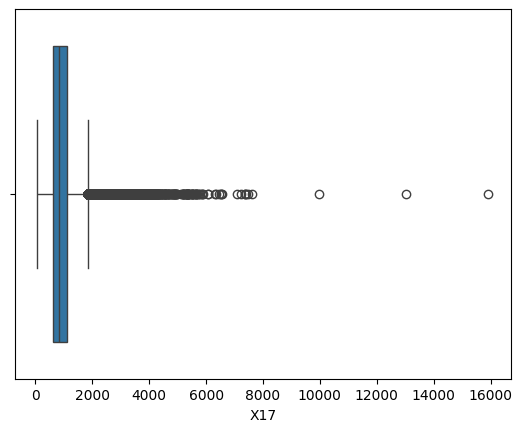

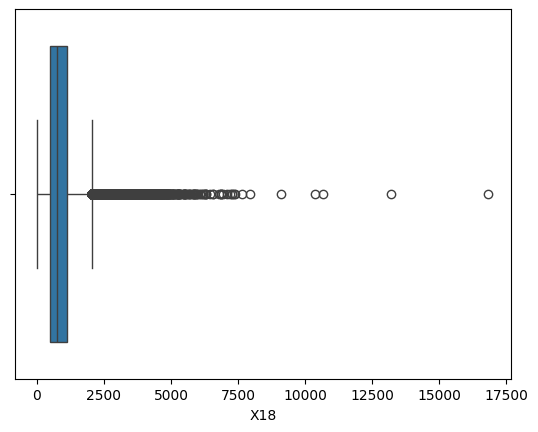

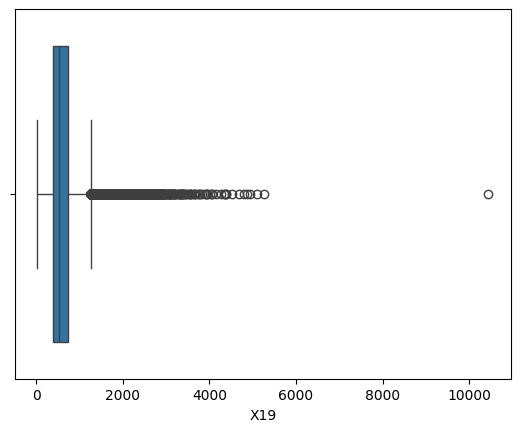

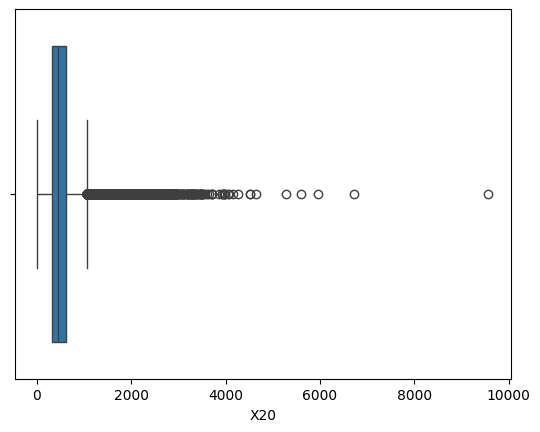

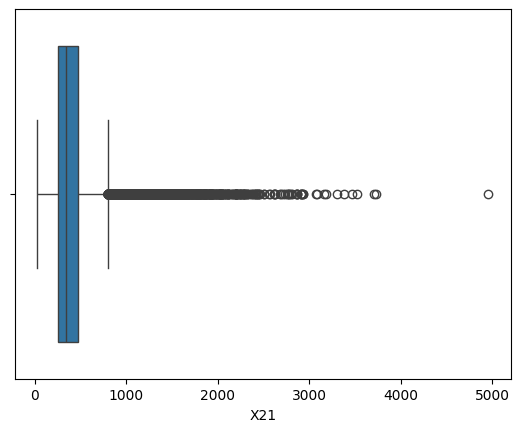

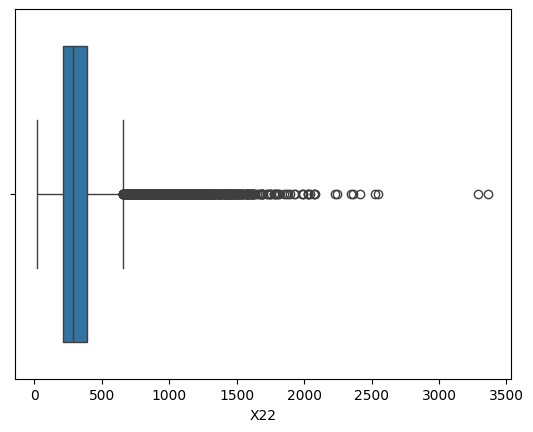

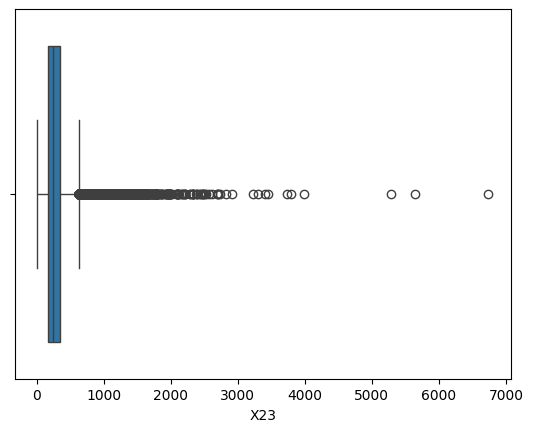

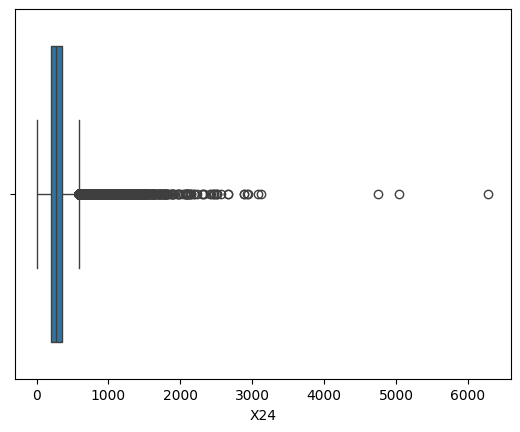

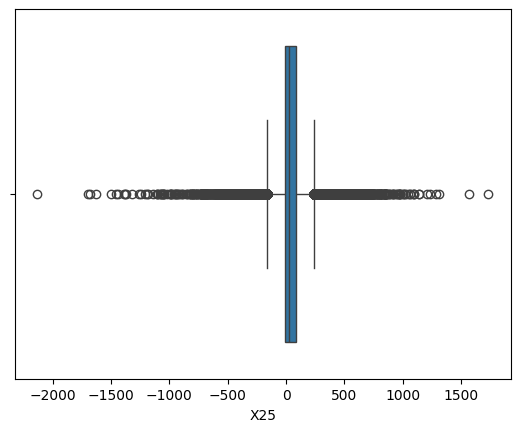

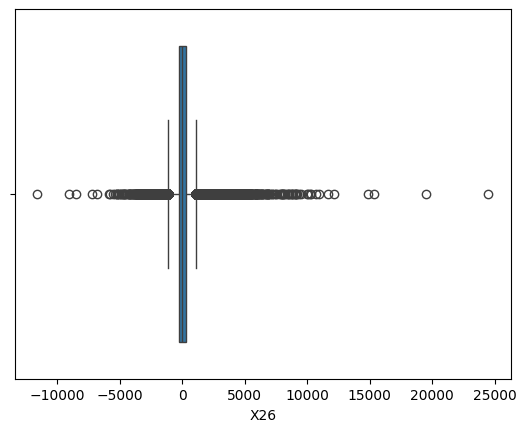

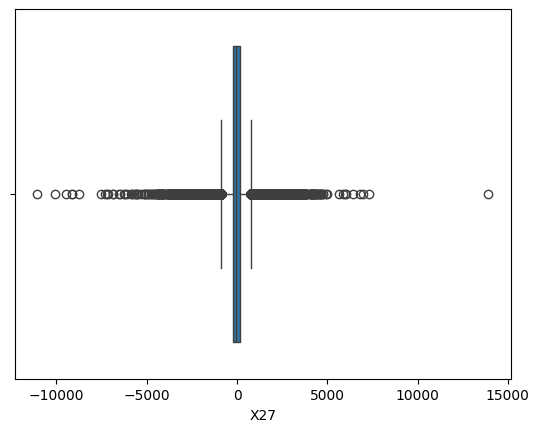

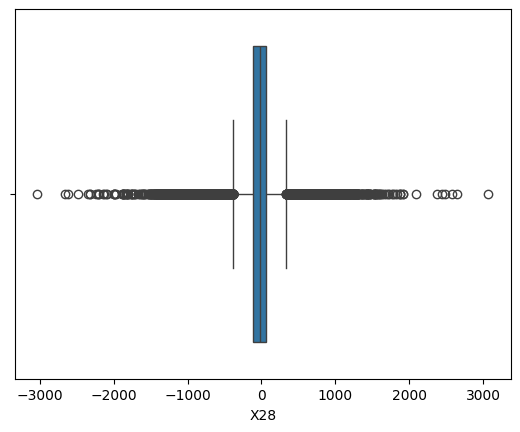

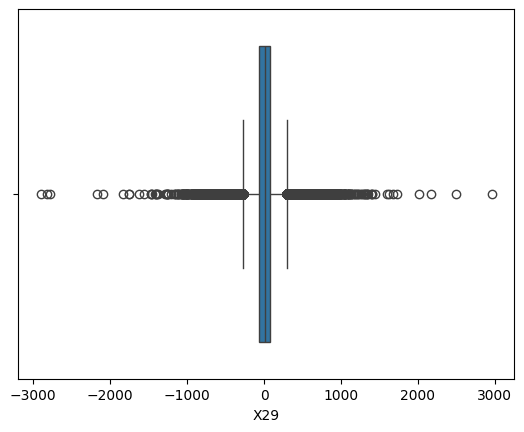

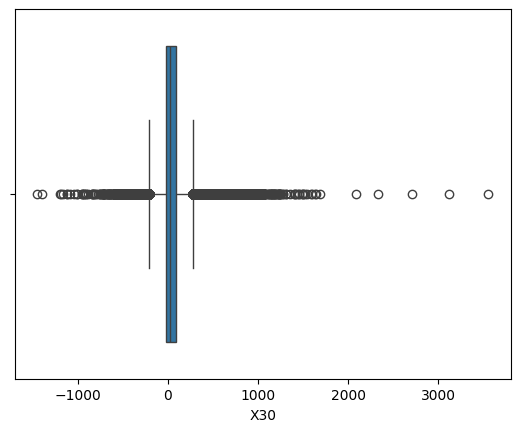

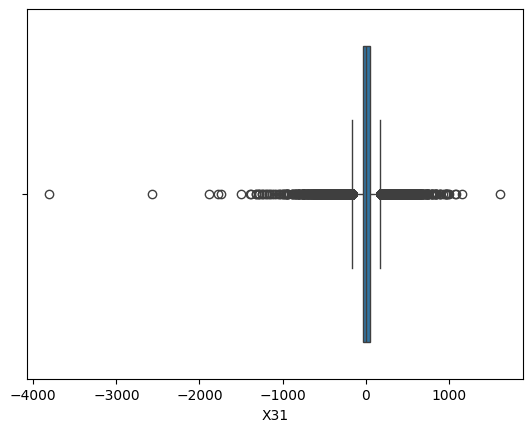

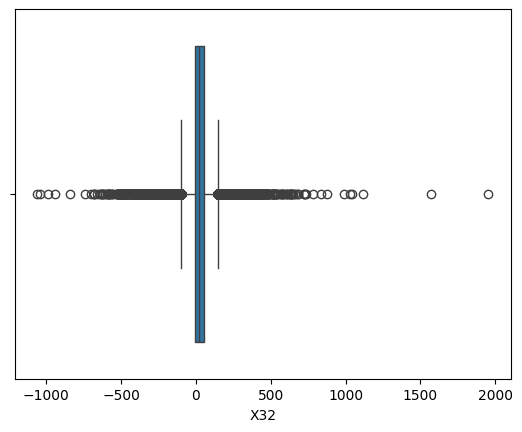

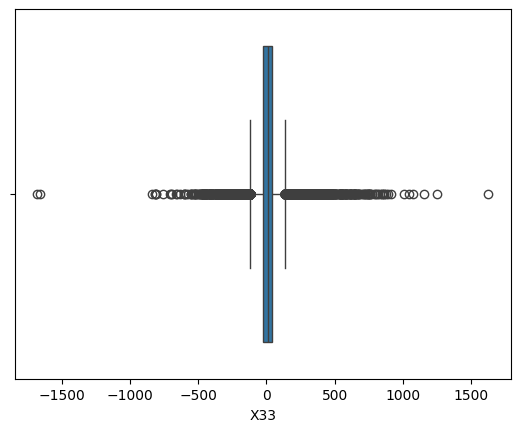

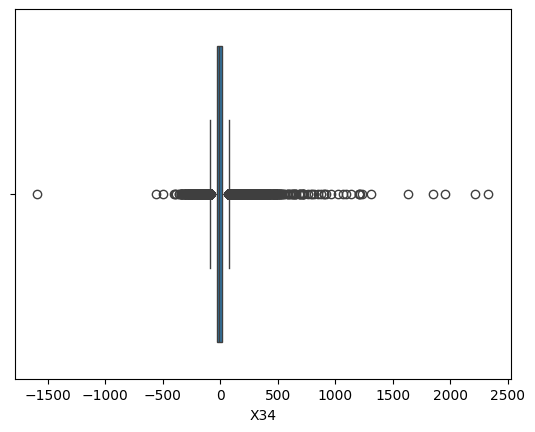

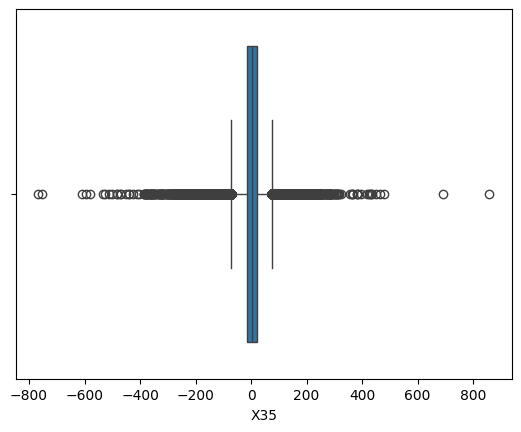

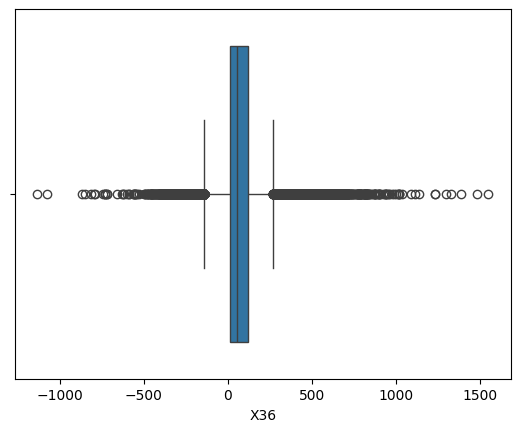

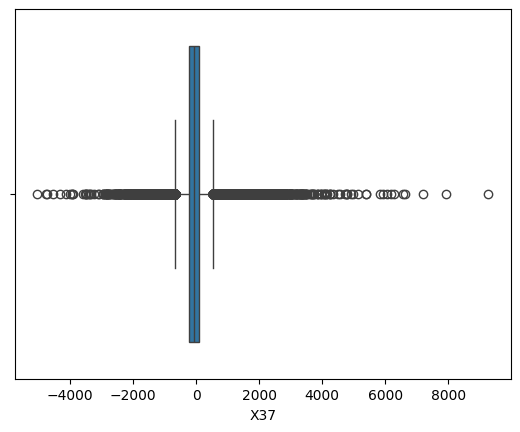

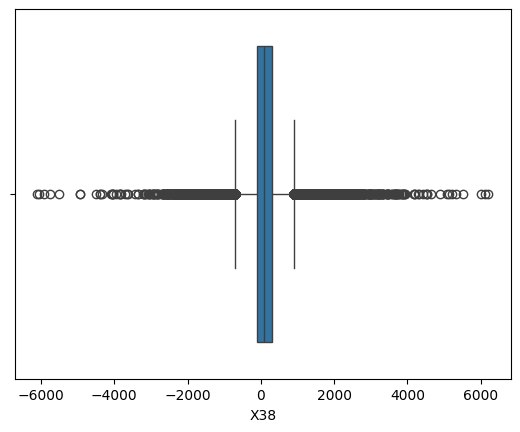

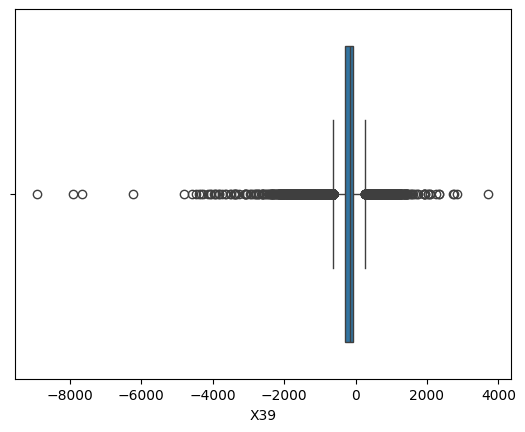

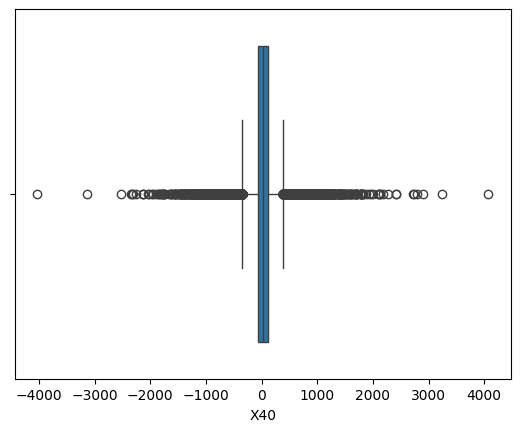

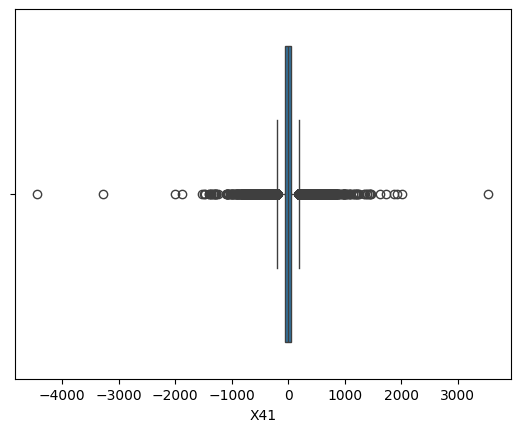

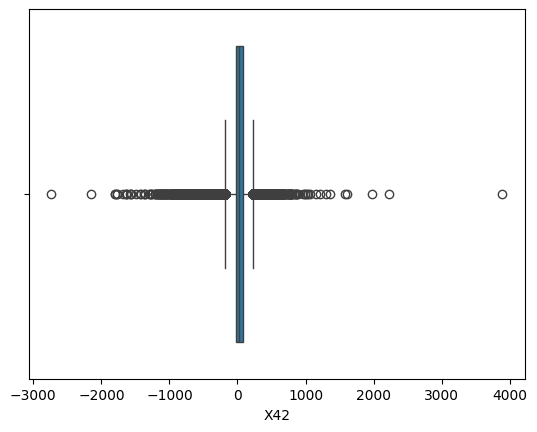

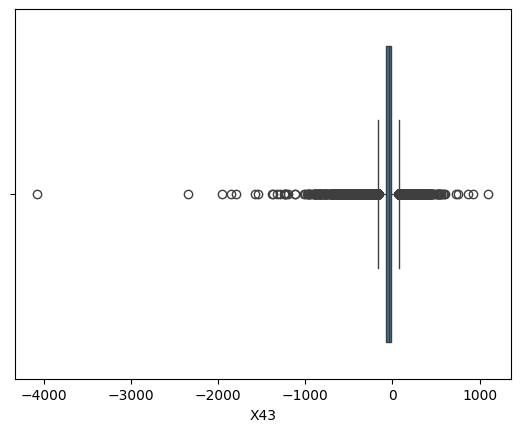

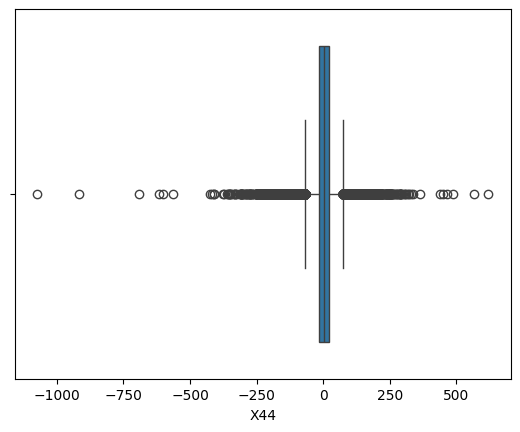

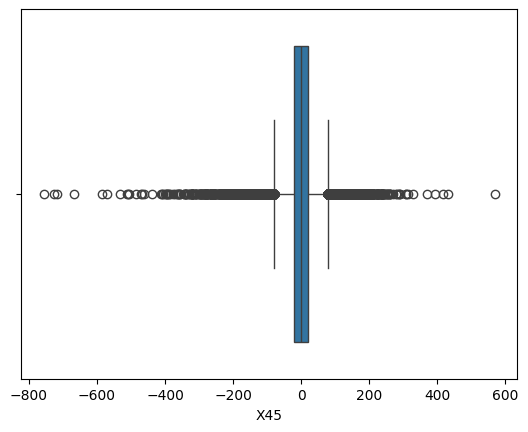

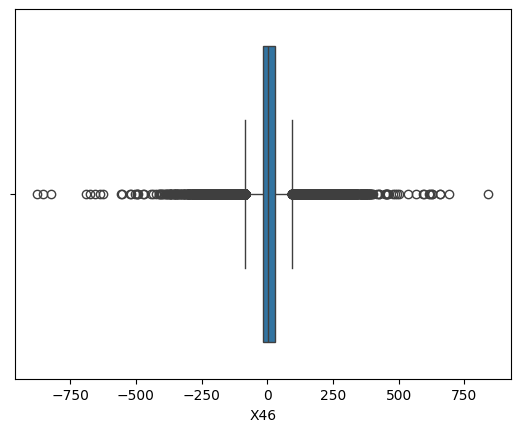

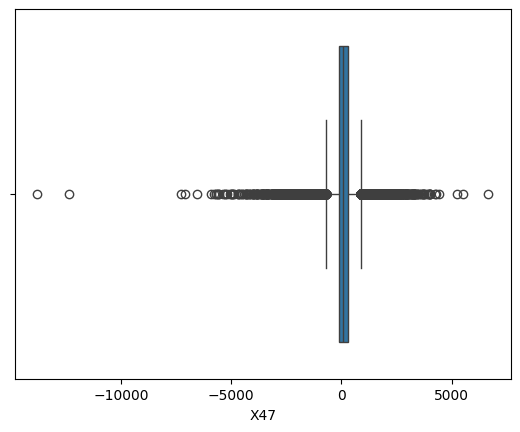

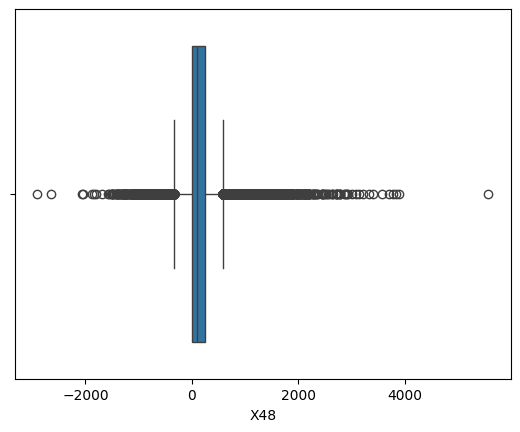

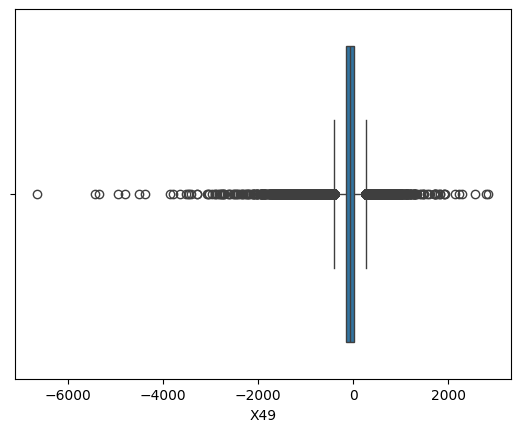

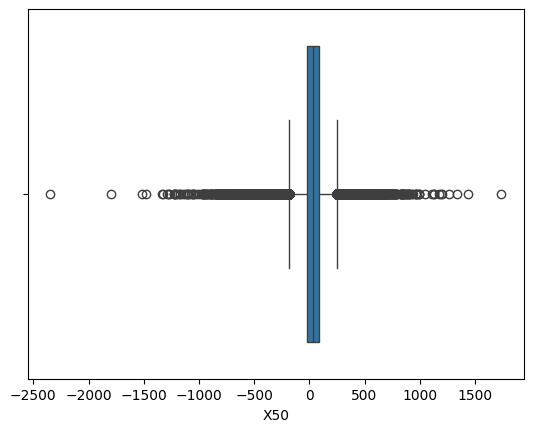

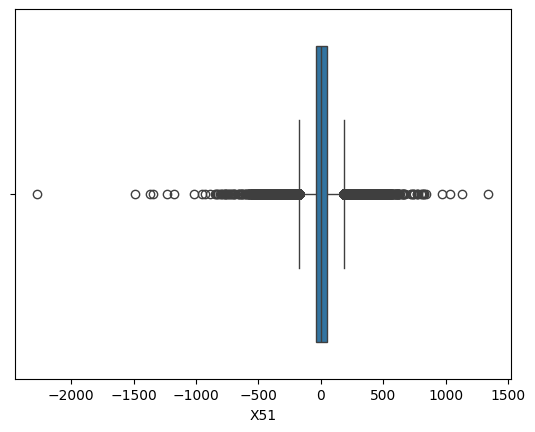

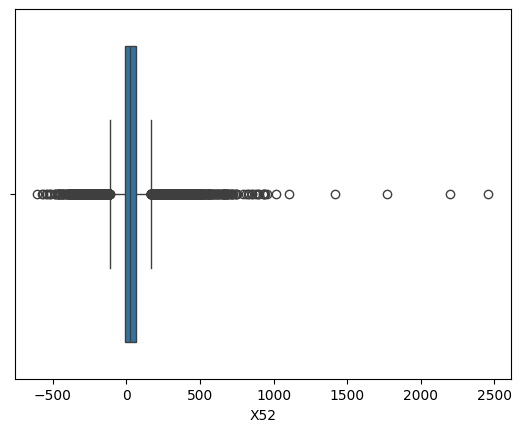

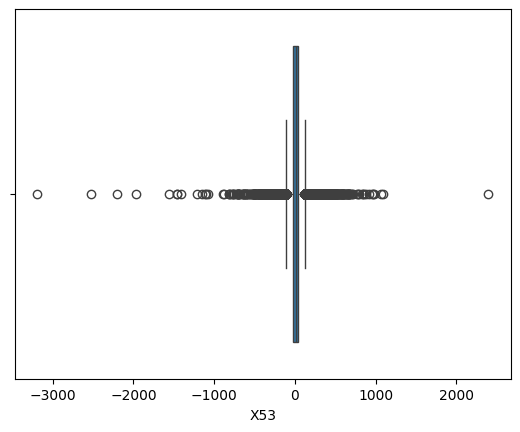

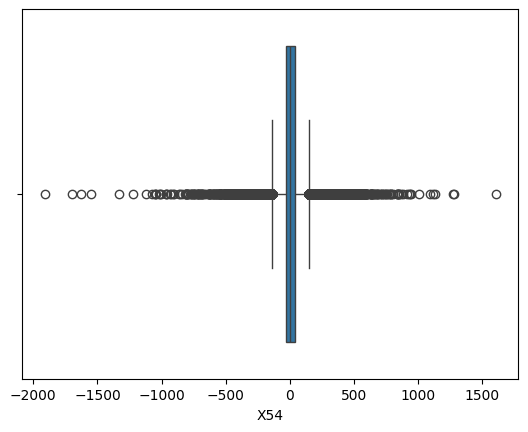

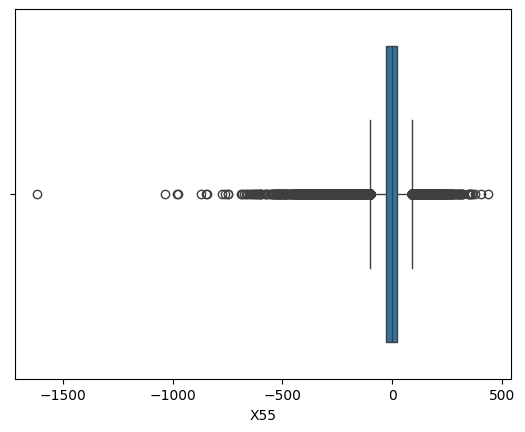

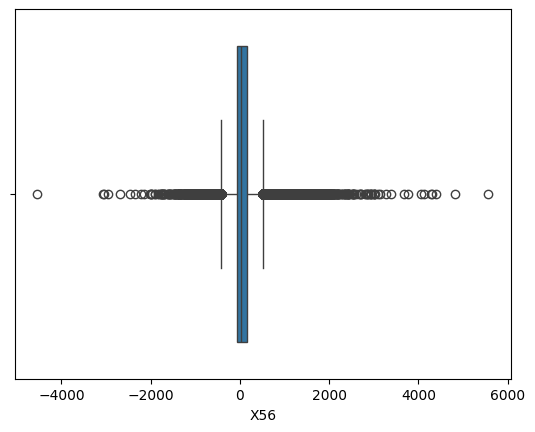

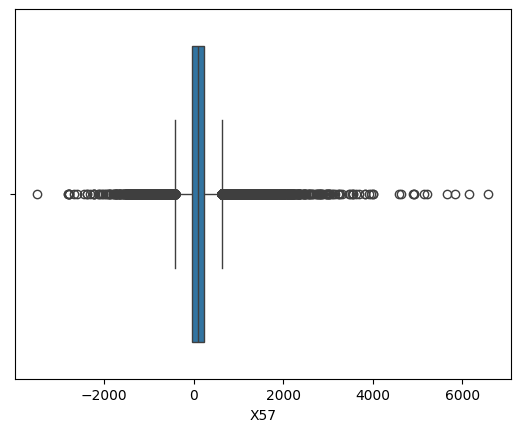

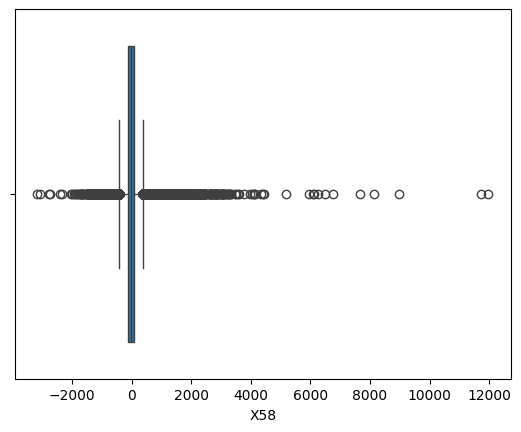

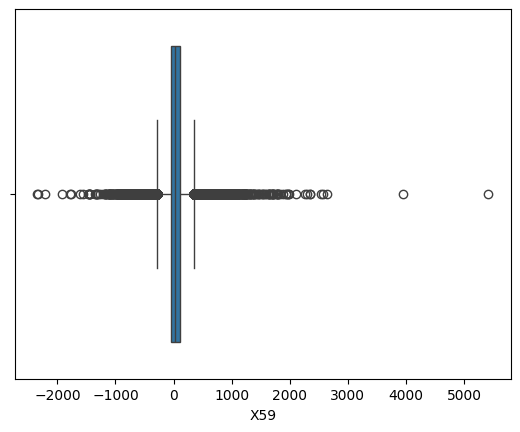

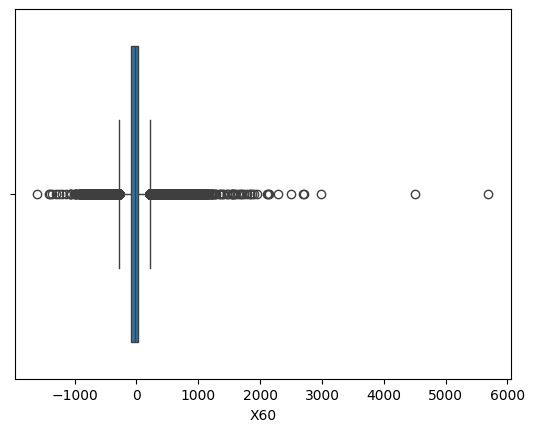

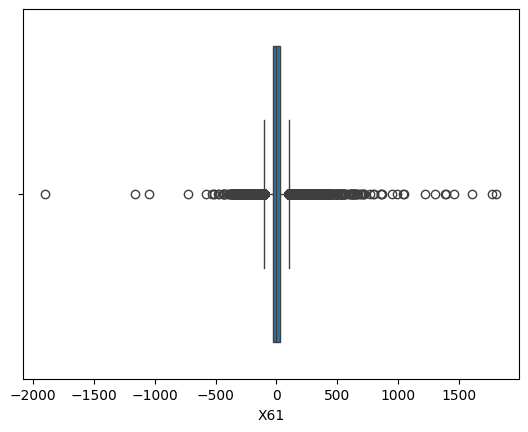

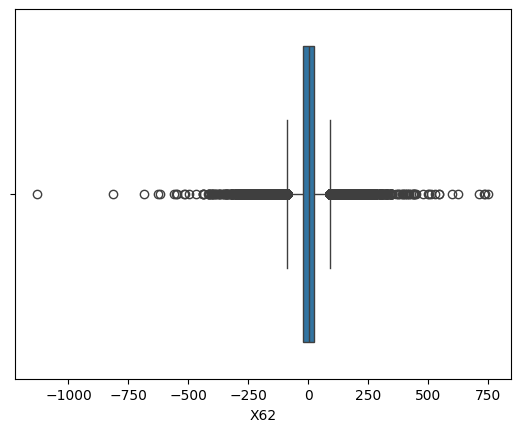

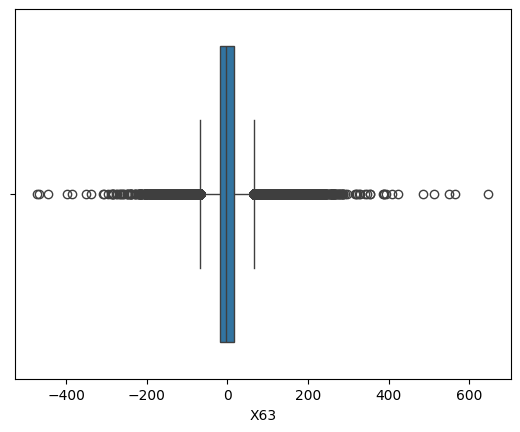

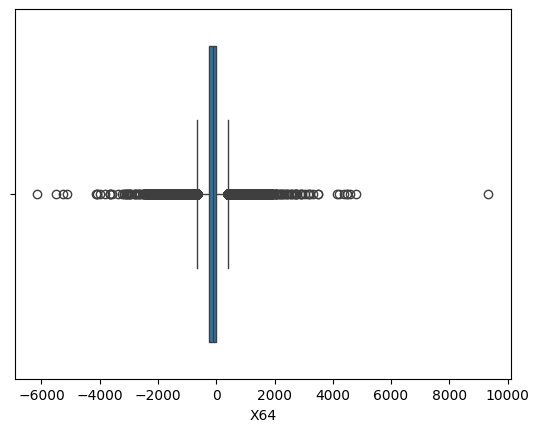

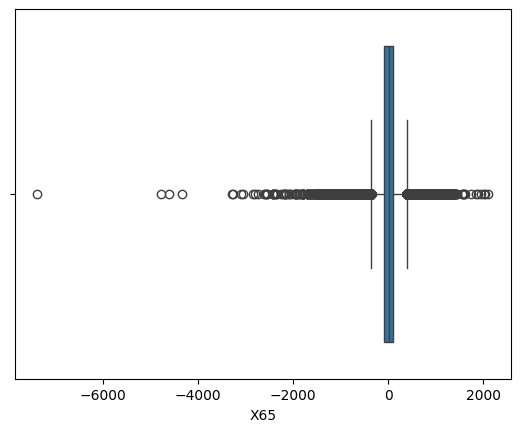

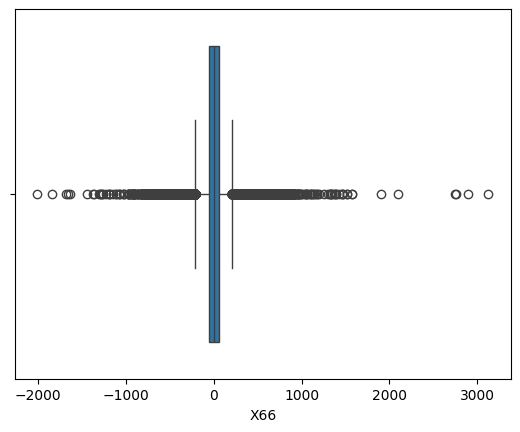

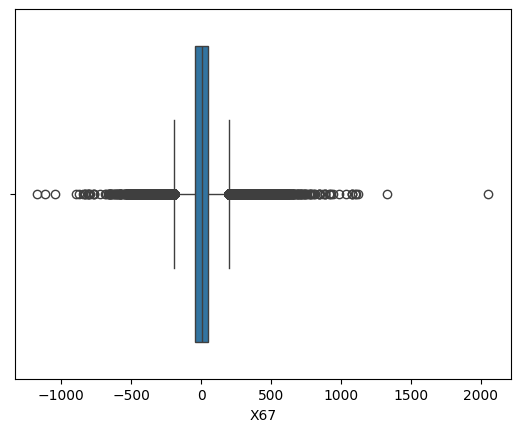

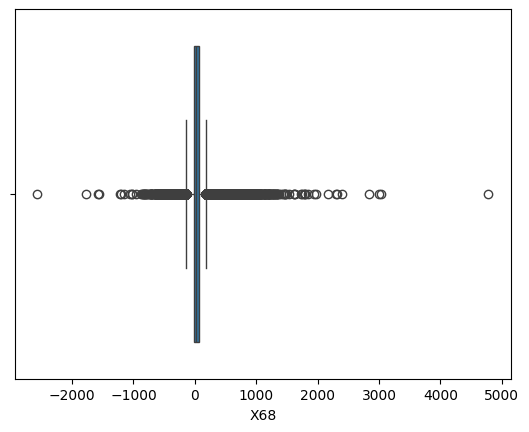

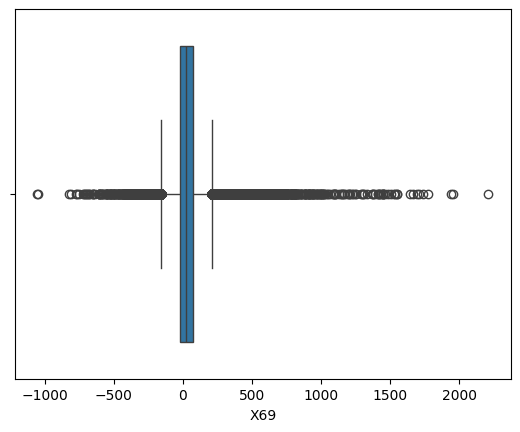

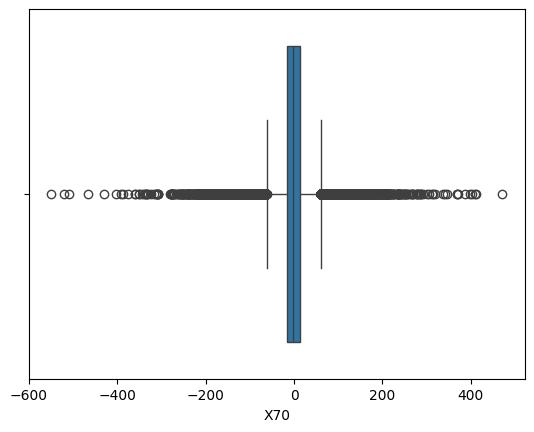

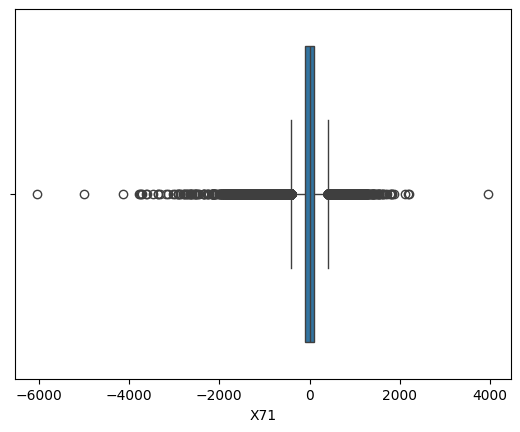

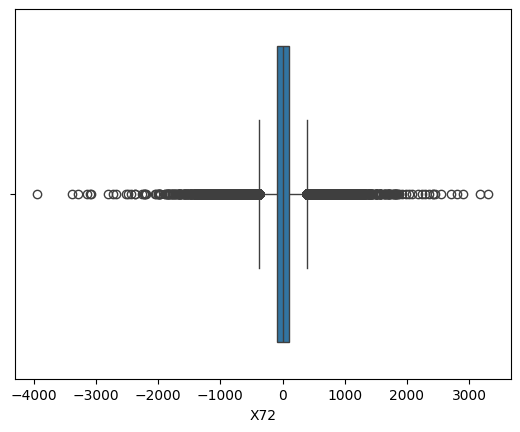

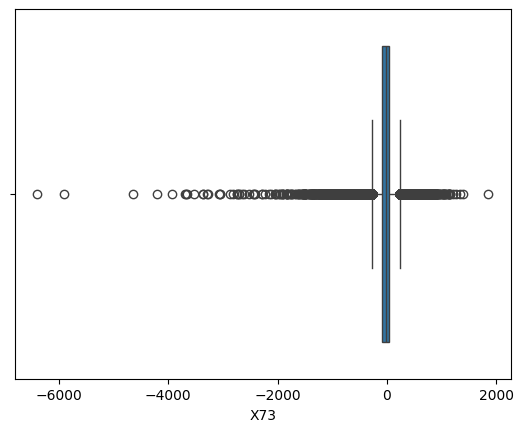

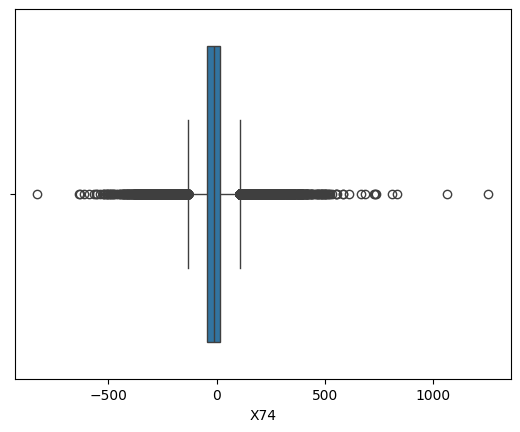

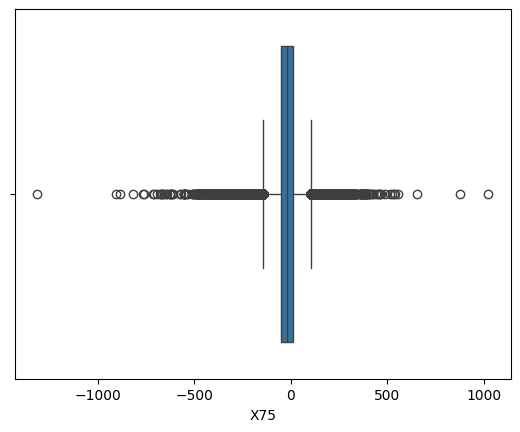

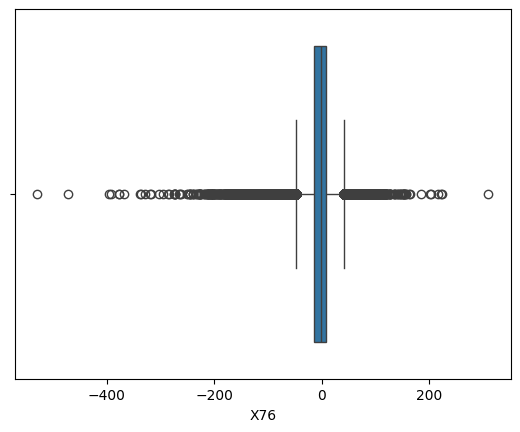

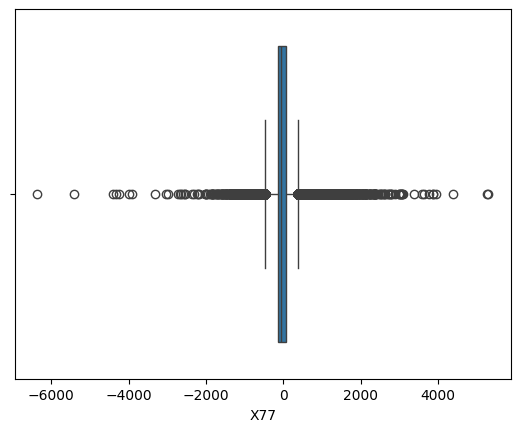

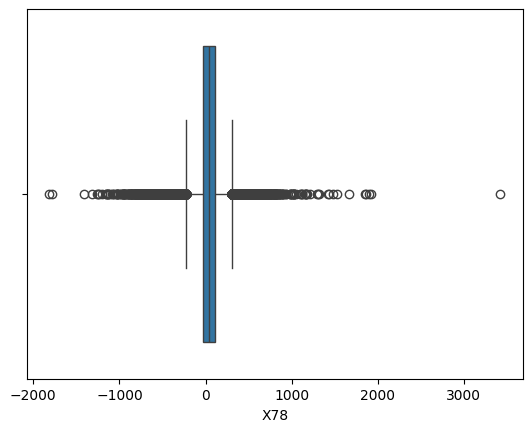

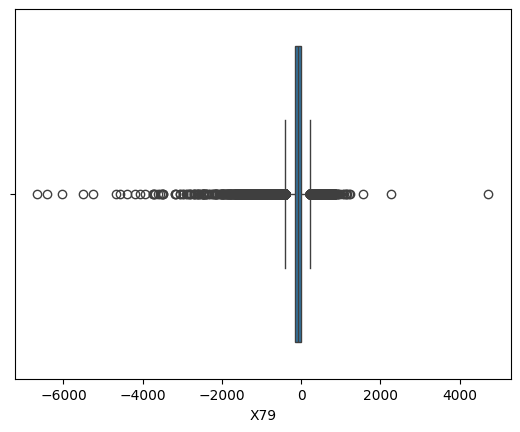

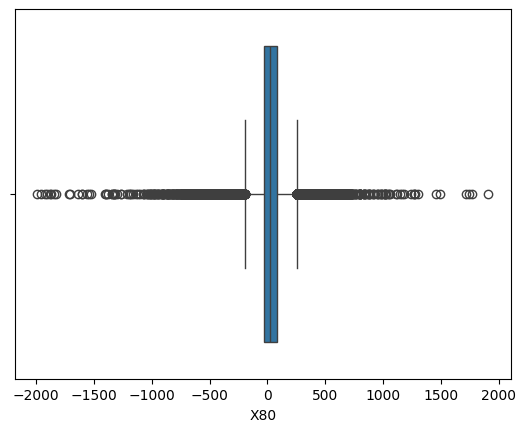

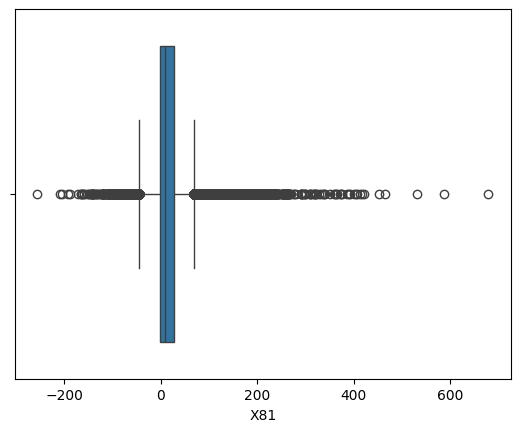

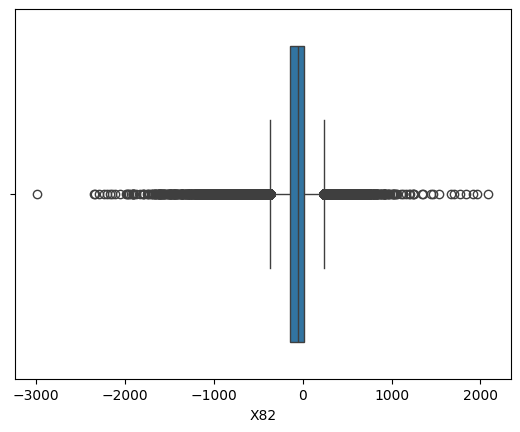

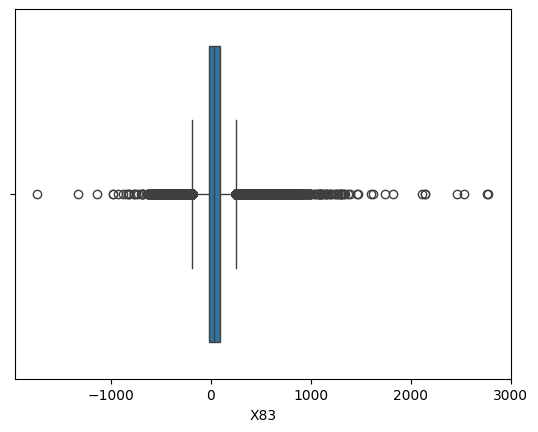

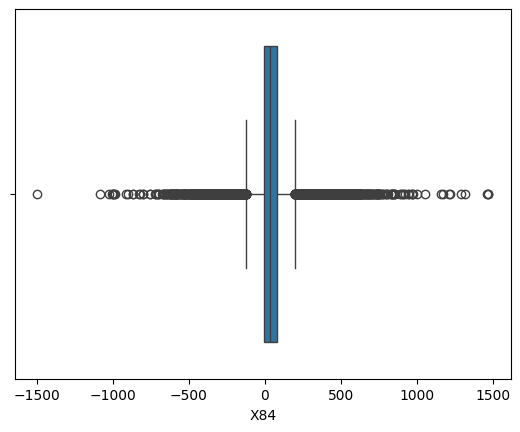

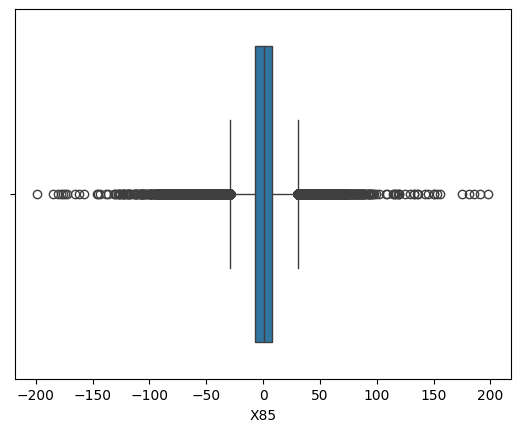

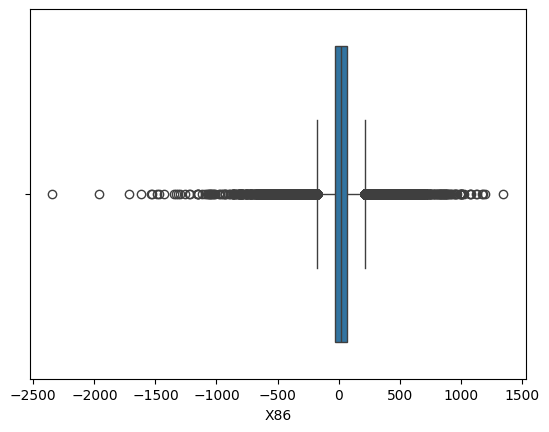

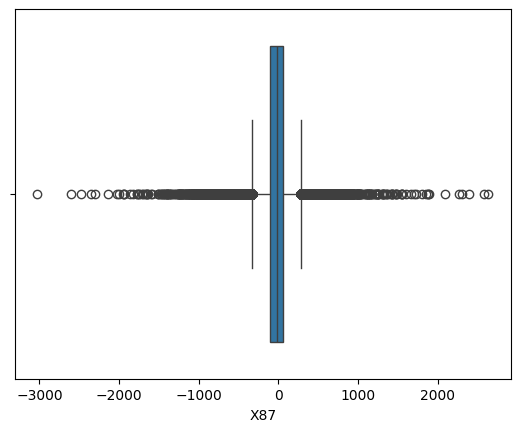

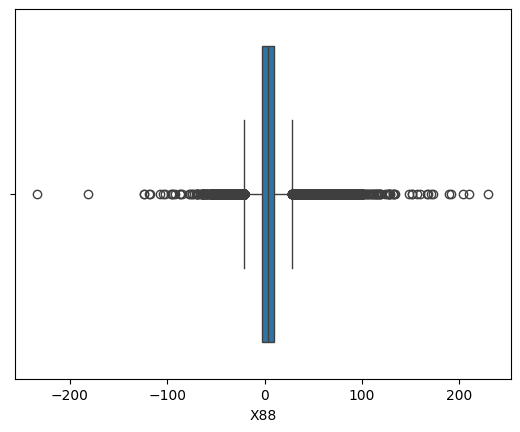

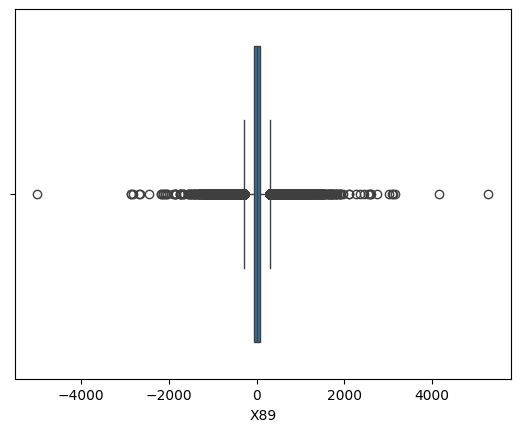

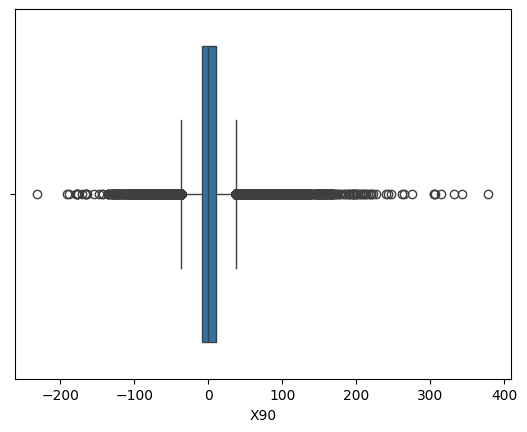

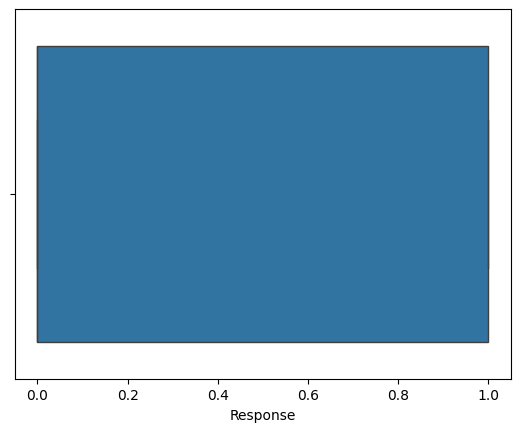

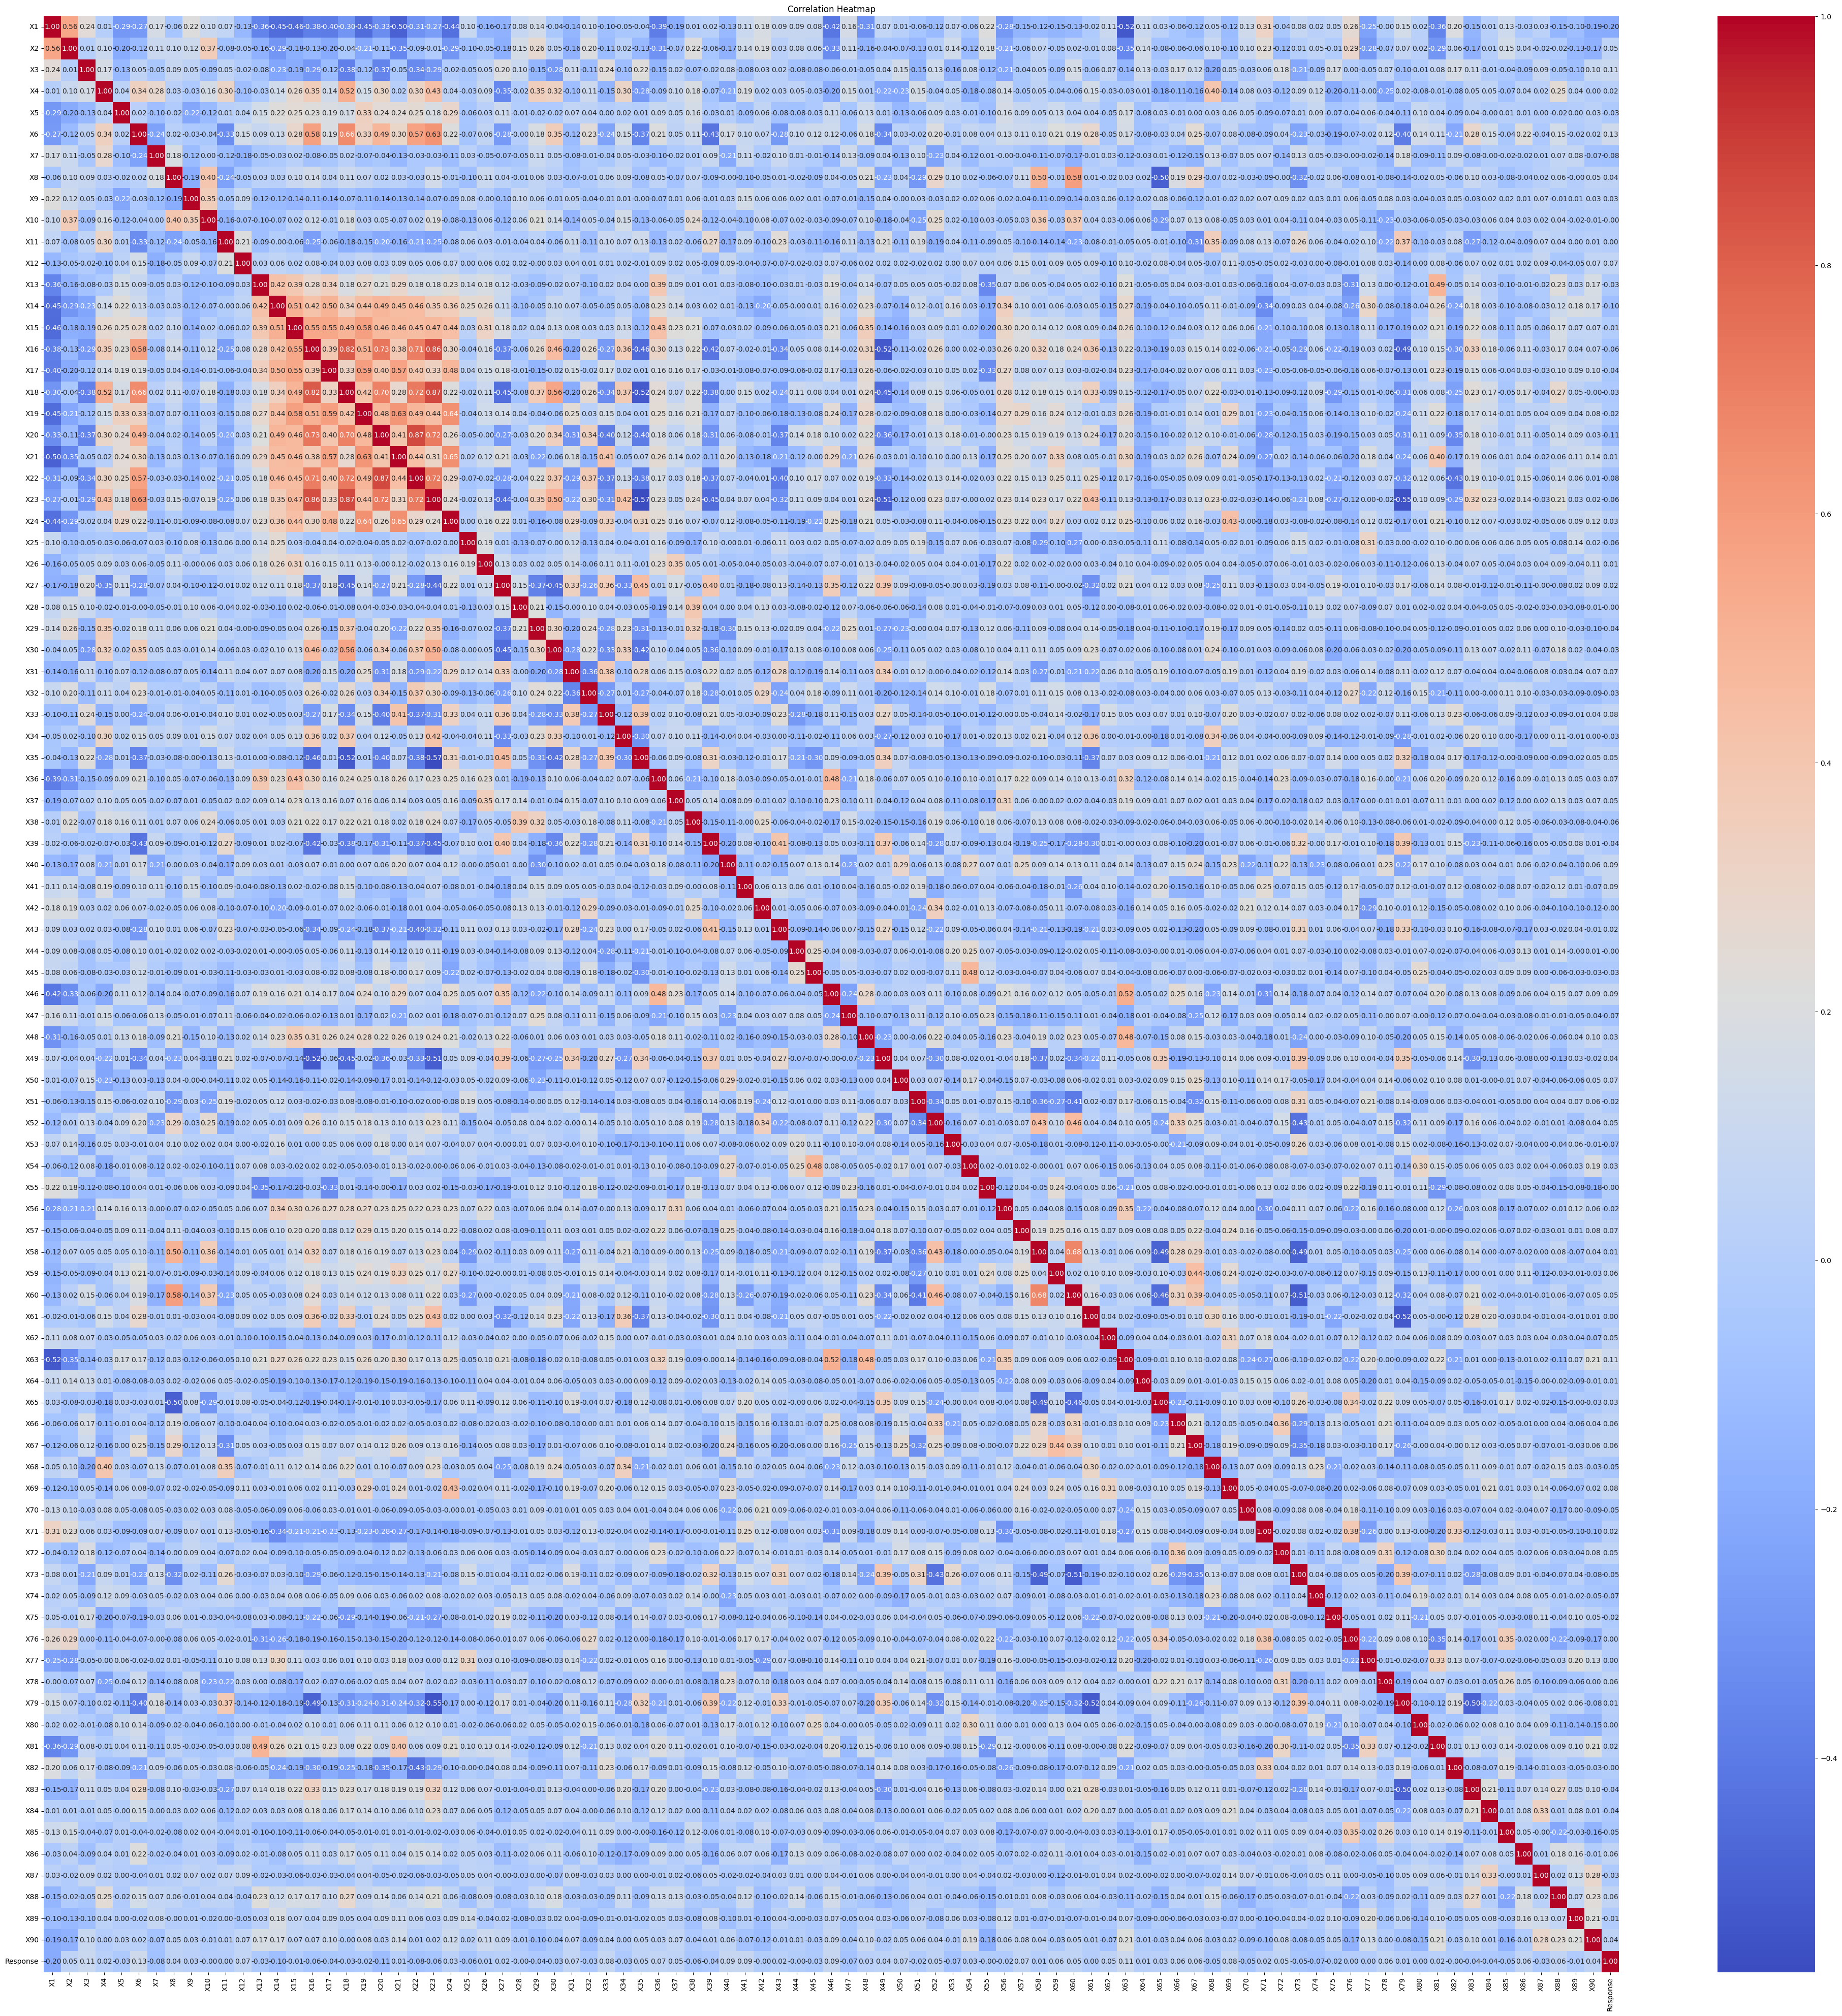

XGBoost Cross-validated accuracy scores: [0.73402597 0.73266234 0.7388961  0.73006494 0.73563218]
XGBoost Classification report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     18029
           1       0.73      0.66      0.69     14971

    accuracy                           0.73     33000
   macro avg       0.73      0.73      0.73     33000
weighted avg       0.73      0.73      0.73     33000

XGBoost Confusion Matrix:
[[14431  3598]
 [ 5157  9814]]
SVM Cross-validated accuracy scores: [0.765      0.76525974 0.76883117 0.7611039  0.7685564 ]
SVM Classification report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80     18029
           1       0.77      0.69      0.73     14971

    accuracy                           0.77     33000
   macro avg       0.77      0.76      0.76     33000
weighted avg       0.77      0.77      0.77     33000

SVM Confusion Matrix:
[[15003  3026]
 [

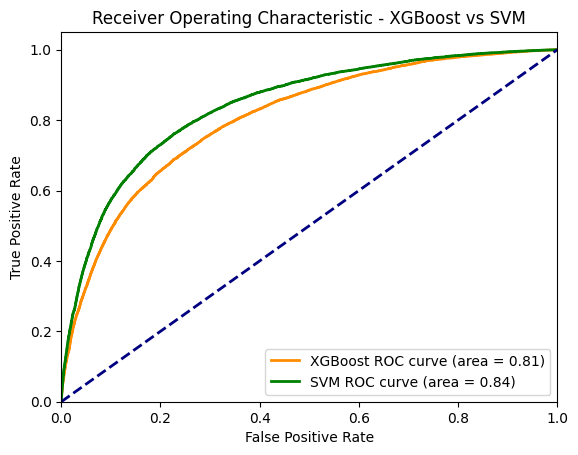

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Loading the dataset
df = pd.read_csv('DiseaseX_Detection_Dataset.csv')

# Data visualization - Descriptive analysis

# Histogram for each predictor
df.hist(figsize=(10, 8))
plt.show()

# Box plot for each feature
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[column])

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data pre-processing

# Checking for missing values
if df.isnull().values.any():
    print("Dataset has missing values.")

# Filling missing values with median
    df.fillna(df.median(), inplace=True)

# Data normalization
scaler = StandardScaler()
features = df.columns[:-1]
df[features] = scaler.fit_transform(df[features])

# Data splitting
X = df[features]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling method - K-Fold cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model-1: XGBoost
xg_model = GradientBoostingClassifier(random_state=42)
xg_cv_scores = cross_val_score(xg_model, X_train, y_train, cv=k_fold, scoring='accuracy')
print(f"XGBoost Cross-validated accuracy scores: {xg_cv_scores}")

# Model training - XGBoost
xg_model.fit(X_train, y_train)

# Model evaluation - XGBoost
xg_y_pred = xg_model.predict(X_test)
print("XGBoost Classification report:")
print(classification_report(y_test, xg_y_pred))

# Confusion matrix - XGBoost
xg_conf_matrix = confusion_matrix(y_test, xg_y_pred)
print("XGBoost Confusion Matrix:")
print(xg_conf_matrix)

# ROC curve - XGBoost
xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xg_model.predict_proba(X_test)[:, 1])
xg_roc_auc = auc(xg_fpr, xg_tpr)

# Model-2: SVM
svm_model = SVC(random_state=42)
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=k_fold, scoring='accuracy')
print(f"SVM Cross-validated accuracy scores: {svm_cv_scores}")

# Model training - SVM
svm_model.fit(X_train, y_train)

# Model evaluation - SVM
svm_y_pred = svm_model.predict(X_test)
print("SVM Classification report:")
print(classification_report(y_test, svm_y_pred))

# Confusion matrix - SVM
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

# ROC curve - SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_model.decision_function(X_test))
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plotting ROC curves
plt.plot(xg_fpr, xg_tpr, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = %0.2f)' % xg_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM ROC curve (area = %0.2f)' % svm_roc_auc)

# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost vs SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Loading the dataset
df = pd.read_csv('DiseaseX_Detection_Dataset.csv')

# Checking for missing values
if df.isnull().values.any():
    print("Dataset has missing values.")
    # Filling missing values with median
    df.fillna(df.median(), inplace=True)

# Data normalization
scaler = StandardScaler()
features = df.columns[:-1]  # Exclude the target variable
df[features] = scaler.fit_transform(df[features])

# Splitting the data into features (X) and target (y)
X = df[features]
y = df['Response']

# Model training - SVM
svm_model = SVC(random_state=42)
svm_model.fit(X, y)

# Loading the test dataset
test_df = pd.read_csv('DiseaseX_Detection_Test.csv')  # Change 'test_data.csv' to your test dataset file name

# Normalizing the test data using the same scaler
test_df[features] = scaler.transform(test_df[features])

# Appling the SVM model to the test dataset
svm_y_hat = svm_model.predict(test_df[features])

# Creating a DataFrame with the predicted values
results_df = pd.DataFrame({'Predicted_Response': svm_y_hat})

# Saving the DataFrame to a CSV file
results_df.to_csv('svm_predictions.csv', index=False)

